## Estadistica Aplicada
Sesión 16 - 28 septiembre

Jorge Sebastian Aguirre Jimenez 1947870

G41

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import yfinance as yf
## Tamaño de grafica
plt.rcParams['figure.figsize']=(10,6)

In [6]:
walmex=yf.download('WALMEX.MX', start='2016-01-01',end='2022-12-31', progress=False)

In [7]:
walmex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,42.959999,43.299999,42.299999,42.840000,35.479031,6483179
2016-01-05,42.849998,43.900002,42.540001,42.660000,35.329964,8115974
2016-01-06,42.650002,43.020000,42.070000,42.380001,35.098068,12511056
2016-01-07,41.320000,42.240002,39.259998,39.990002,33.118736,18124494
2016-01-08,40.990002,41.490002,40.700001,41.029999,33.980030,15949791


In [8]:
walmex=walmex[['Adj Close']]

In [9]:
walmex.head()

,Adj Close
Date,
2016-01-04,35.479031
2016-01-05,35.329964
2016-01-06,35.098068
2016-01-07,33.118736
2016-01-08,33.980030


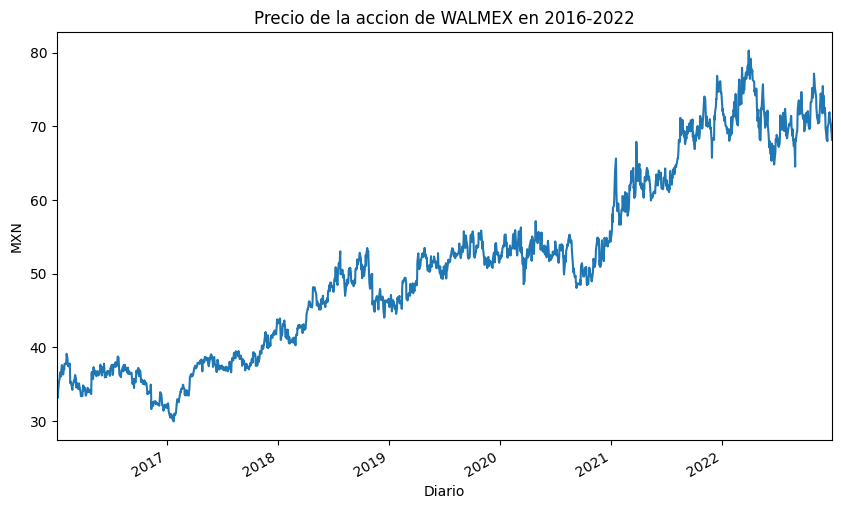

In [17]:
## Graficar

walmex['Adj Close'].plot()
plt.title('Precio de la accion de WALMEX en 2016-2022')
plt.ylabel('MXN')
plt.xlabel('Diario')
plt.xlim('2016-01-04','2022-12-30');

In [18]:
walmex.head(1)

,Adj Close
Date,
2016-01-04,35.479031


In [19]:
walmex.tail(1)

,Adj Close
Date,
2022-12-30,68.158188


In [20]:
## Calcular PMS-10, PMS-50
## Señal de corto plazo
walmex['PMS-10']=walmex['Adj Close'].rolling(10).mean()
## Señal de largo plazo
walmex['PMS-50']=walmex['Adj Close'].rolling(50).mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3900\1834108911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['PMS-10']=walmex['Adj Close'].rolling(10).mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_3900\1834108911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['PMS-50']=walmex['Adj Close'].rolling(50).mean()


In [21]:
walmex.head()

,Adj Close,PMS-10,PMS-50
Date,,,
2016-01-04,35.479031,NaN,NaN
2016-01-05,35.329964,NaN,NaN
2016-01-06,35.098068,NaN,NaN
2016-01-07,33.118736,NaN,NaN
2016-01-08,33.980030,NaN,NaN


<Axes: xlabel='Date'>

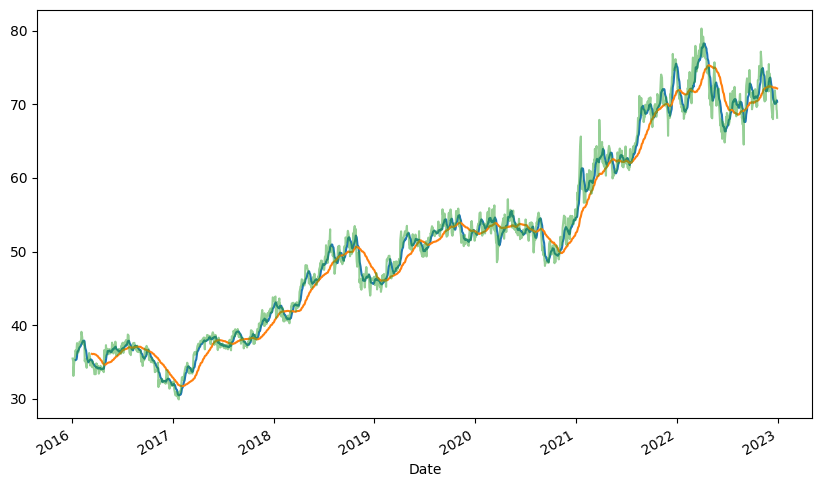

In [25]:
walmex['PMS-10'].plot()
walmex['PMS-50'].plot()
## Alpha=0 es transparente, Alpha=1 es no transparente
walmex['Adj Close'].plot(alpha=0.5)

In [27]:
## Estrategia

walmex['Estrategia']=walmex['PMS-10']>walmex['PMS-50']
walmex.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3900\2611408697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['Estrategia']=walmex['PMS-10']>walmex['PMS-50']


,Adj Close,PMS-10,PMS-50,Estrategia
Date,,,,
2016-01-04,35.479031,NaN,NaN,False
2016-01-05,35.329964,NaN,NaN,False
2016-01-06,35.098068,NaN,NaN,False
2016-01-07,33.118736,NaN,NaN,False
2016-01-08,33.980030,NaN,NaN,False


Retorno= $\frac{P_t-P_{t-1}} {P_{t-1}}$

In [28]:
walmex['Retorno']=walmex['Adj Close'].pct_change()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3900\4186657633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['Retorno']=walmex['Adj Close'].pct_change()


In [29]:
walmex.head()

,Adj Close,PMS-10,PMS-50,Estrategia,Retorno
Date,,,,,
2016-01-04,35.479031,NaN,NaN,False,NaN
2016-01-05,35.329964,NaN,NaN,False,-0.004202
2016-01-06,35.098068,NaN,NaN,False,-0.006564
2016-01-07,33.118736,NaN,NaN,False,-0.056394
2016-01-08,33.980030,NaN,NaN,False,0.026006


<Axes: xlabel='Date'>

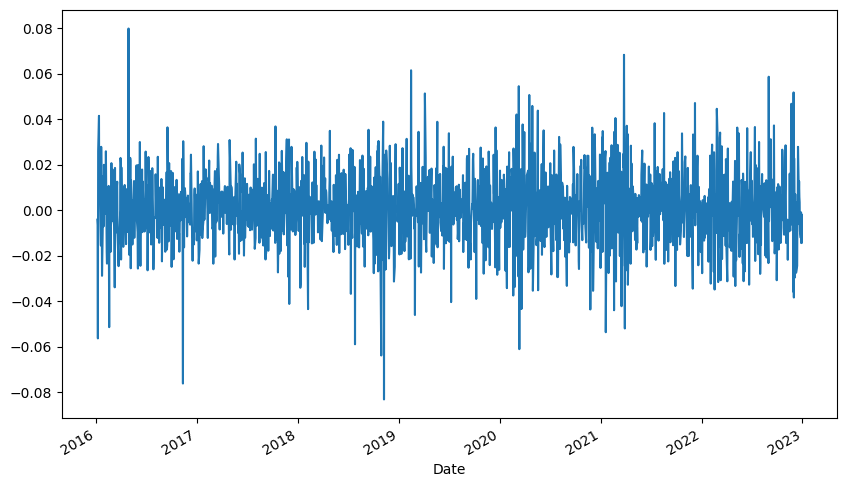

In [30]:
walmex['Retorno'].plot()